## (a) Prepare CRUW_MINI dataset

Download CRUW_MINI dataset and unzip to your colab. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/CRUW/
!unzip CRUW_MINI_AU21.zip

Streaming output truncated to the last 5000 lines.
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000388.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000389.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000390.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000391.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000392.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000393.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000394.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000395.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000396.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000397.jpg  
  inflating: sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000398.jpg  
  inflating: sequences/tr

### Install CRUW dataset devkit

In [ ]:
%cd /content
!git clone https://github.com/yizhou-wang/cruw-devkit.git
%cd cruw-devkit/
!pip install -e .
%cd ..

/content
Cloning into 'cruw-devkit'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 90 (delta 28), reused 76 (delta 18), pack-reused 0
Unpacking objects: 100% (90/90), done.
/content/cruw-devkit
Obtaining file:///content/cruw-devkit
  Running setup.py develop for cruw-devkit
/content


### Visualize some examples in CRUW_MINI

Note: You need to **restart** your runtime before importing `cruw` package.

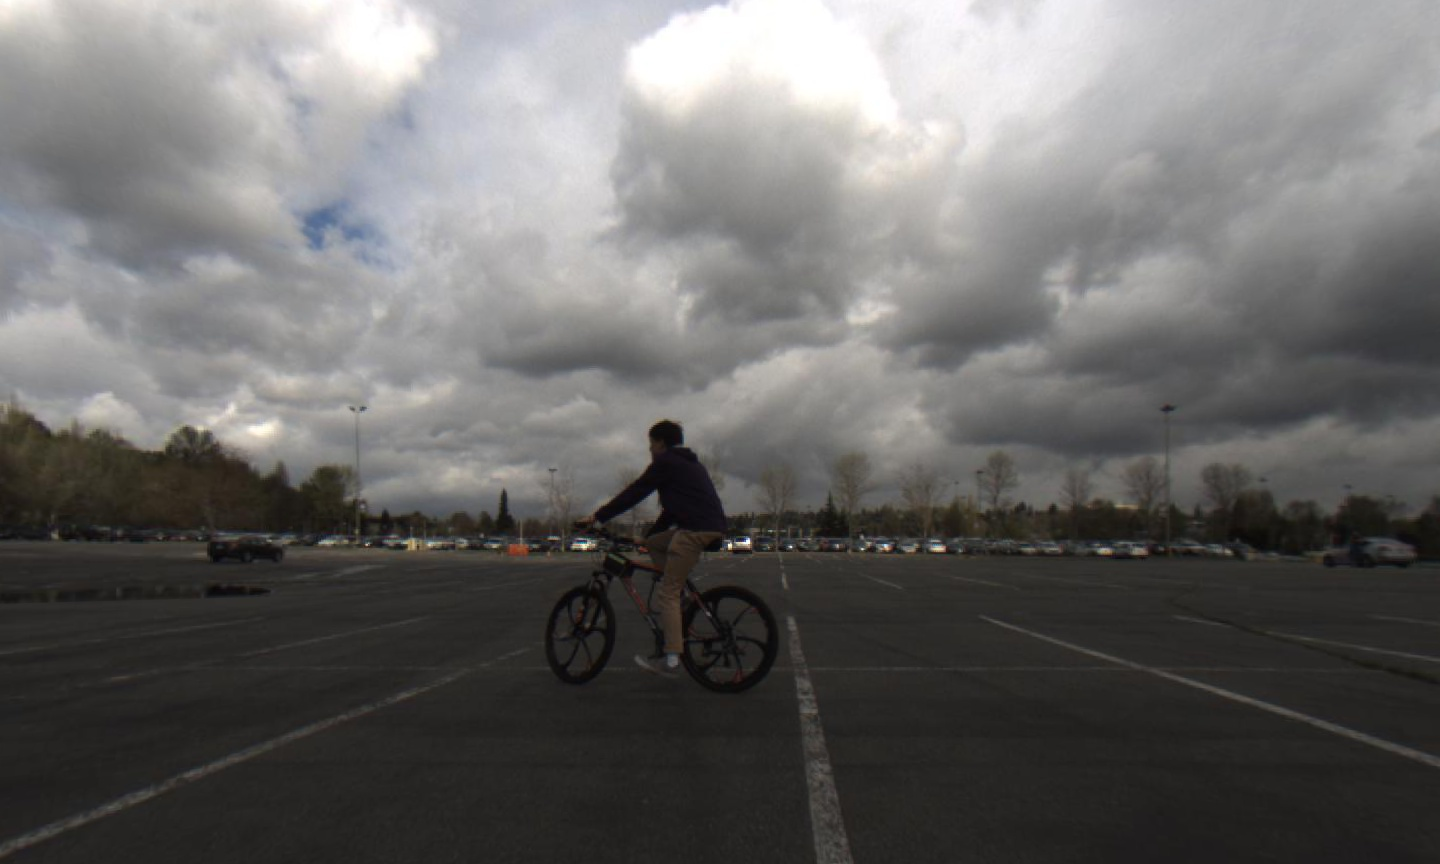

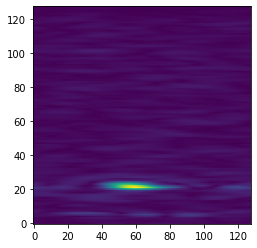

In [ ]:
import os
from cruw.cruw import CRUW
from cruw.visualization.draw_rf import magnitude
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

data_root = '/content/gdrive/MyDrive/CRUW'
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config')

# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/IMAGES_0/0000000238.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/RADAR_RA_H/000238.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

In [ ]:
# TODO: visualize some other images in CRUW

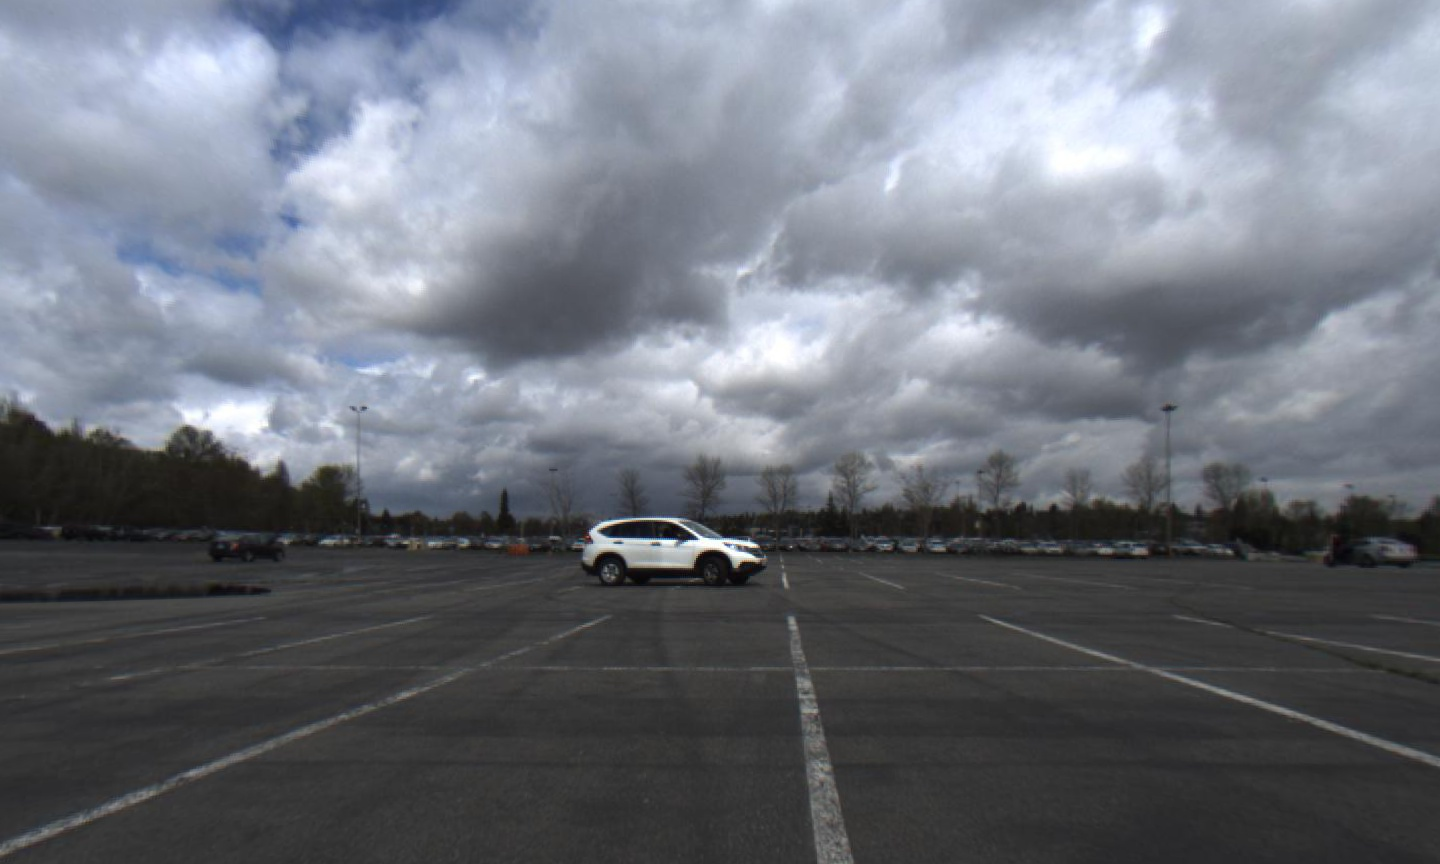

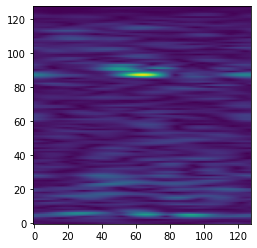

In [ ]:
#1
# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000238.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_CMS1002_PL_NORMAL/RADAR_RA_H/000238.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

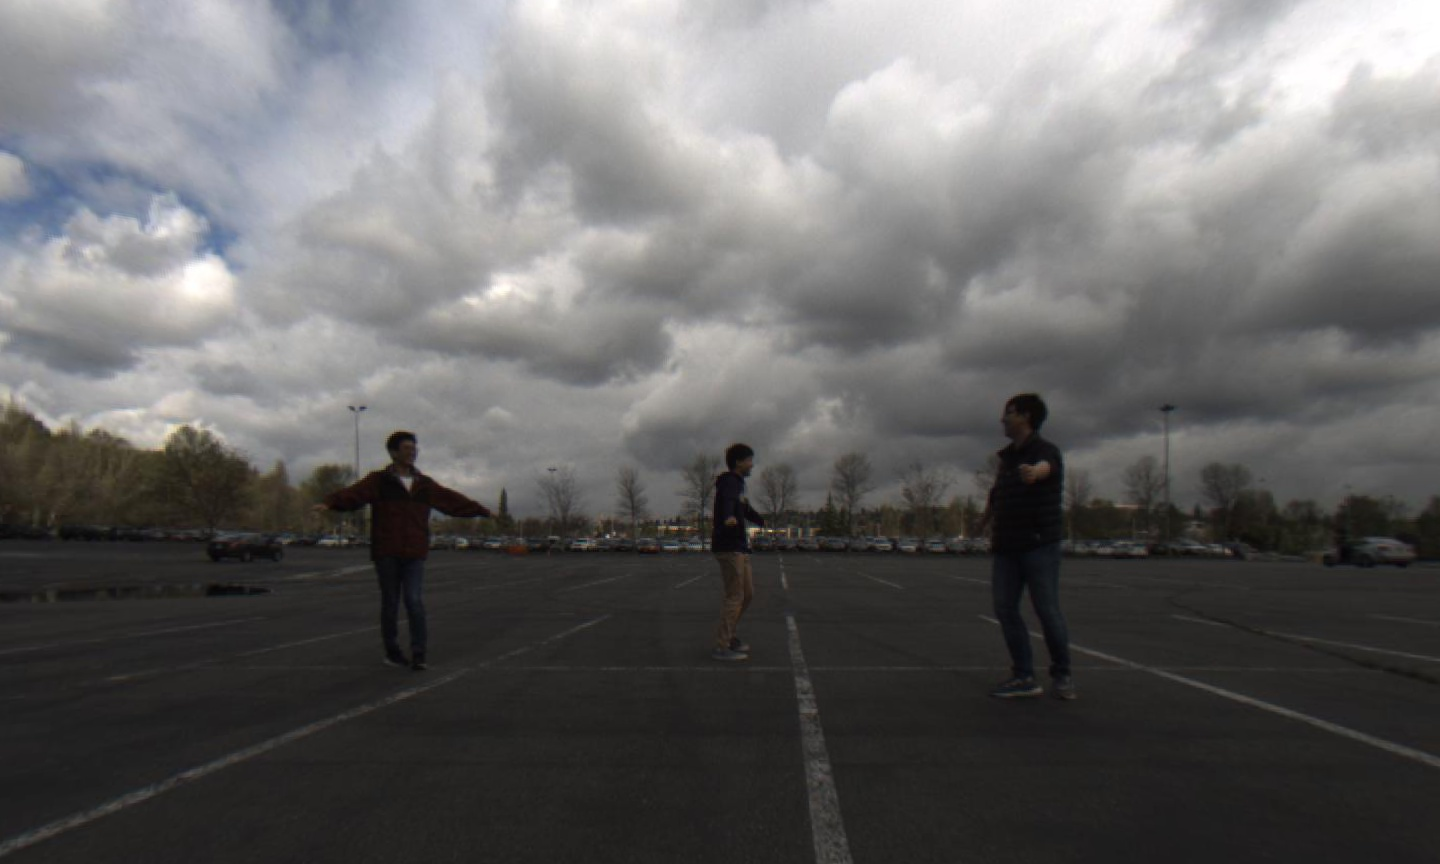

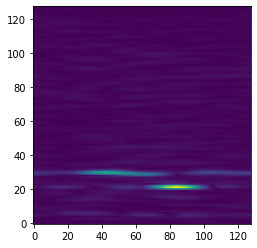

In [ ]:
#2
# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_PMS3001_PL_NORMAL/IMAGES_0/0000000238.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_PMS3001_PL_NORMAL/RADAR_RA_H/000238.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

## (b) Train RODNet

### Install RODNet package

In [ ]:
!git clone https://github.com/yizhou-wang/RODNet.git
%cd RODNet/
!pip install -e .

Cloning into 'RODNet'...
remote: Enumerating objects: 1735, done.
remote: Counting objects: 100% (1735/1735), done.
remote: Compressing objects: 100% (1646/1646), done.
remote: Total 1735 (delta 102), reused 1709 (delta 79), pack-reused 0
Receiving objects: 100% (1735/1735), 1.70 MiB | 14.60 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/RODNet
Obtaining file:///content/RODNet
  Running setup.py develop for rodnet


### Prepare data for RODNet training and inference

**Note**: Remember to change data paths in your configuration file.

In [ ]:
!python tools/prepare_dataset/prepare_data.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_root /content/gdrive/MyDrive/CRUW/ --split train,test --out_data_dir data/cruw_mini

Preparing train sets ...
Sequence /content/gdrive/MyDrive/CRUW/sequences/train/2019_04_09_BMS1000_PL_NORMAL saving to data/cruw_mini/train/2019_04_09_BMS1000_PL_NORMAL.pkl
Sequence /content/gdrive/MyDrive/CRUW/sequences/train/2019_04_09_CMS1002_PL_NORMAL saving to data/cruw_mini/train/2019_04_09_CMS1002_PL_NORMAL.pkl
Sequence /content/gdrive/MyDrive/CRUW/sequences/train/2019_04_09_PMS3001_PL_NORMAL saving to data/cruw_mini/train/2019_04_09_PMS3001_PL_NORMAL.pkl
Sequence /content/gdrive/MyDrive/CRUW/sequences/train/2019_05_29_MLMS006_CR_BLUR saving to data/cruw_mini/train/2019_05_29_MLMS006_CR_BLUR.pkl
Preparing test sets ...
Sequence /content/gdrive/MyDrive/CRUW/sequences/test/2019_05_29_PBMS007_PL_BLUR saving to data/cruw_mini/test/2019_05_29_PBMS007_PL_BLUR.pkl


Visualize some generated ConfMaps.

In [ ]:
import pickle
data_details = pickle.load(open('data/cruw_mini/train/2019_04_09_BMS1000_PL_NORMAL.pkl', 'rb'))
print(data_details.keys())

dict_keys(['data_root', 'data_path', 'seq_name', 'n_frame', 'image_paths', 'radar_paths', 'anno'])


In [ ]:
annotations = data_details['anno']
print(annotations.keys())

dict_keys(['metadata', 'confmaps'])


In [ ]:
metadata = annotations['metadata']
confmaps = annotations['confmaps']
print(confmaps.shape)

(897, 4, 128, 128)


{'folder_name': 'RADAR_RA_H', 'frame_name': '000238.npy', 'range': 128, 'azimuth': 128, 'n_chirps': 255, 'n_objects': 1, 'obj_info': {'anno_source': 'human', 'categories': ['cyclist'], 'centers': [[5.129961602810725, -0.017453292519943098]], 'center_ids': [[21, 62]], 'scores': [1.0]}}


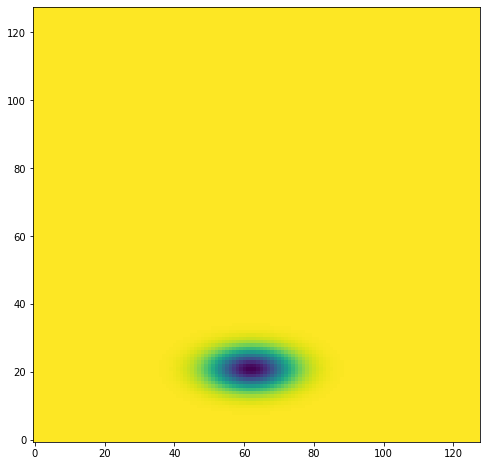

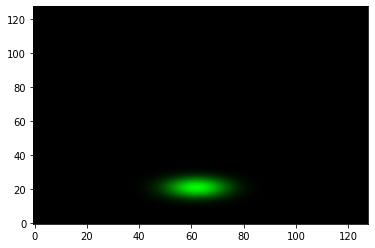

In [ ]:
from rodnet.utils.visualization.confmap import visualize_confmap

print(metadata[238]['rad_h'])
visualize_confmap(confmaps[238])

### Train RODNet

Train the RODNet using the configuration named `config_rodnet_cdc_win16.py` for at least 5 epochs.

In [ ]:
!python tools/train.py --config configs/config_rodnet_cdc_win16.py --sensor_config sensor_config --data_dir data/cruw_mini/ --log_dir checkpoints/rodnet_cdc_win16

Building dataloader ... (Mode: normal)
100% 4/4 [00:09<00:00,  2.33s/it]
Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
Model name: rodnet-cdc-win16-wobg-20211129-110444
Number of sequences to train: 4
Training dataset length: 885
Batch size: 4
Number of iterations in each epoch: 221
epoch  1, iter    1: loss: 0.00452161 | load time: 0.1692 | backward time: 1.1567
epoch  1, iter  101: loss: 0.00238063 | load time: 0.1058 | backward time: 1.5613
epoch  1, iter  201: loss: 0.00204644 | load time: 0.1090 | backward time: 1.5549
saving current epoch model ...
epoch  2, iter    1: loss: 0.00197484 | load time: 0.1958 | backward time: 1.1355
epoch  2, iter  101: loss: 0.00159866 | load time: 0.1057 | backward time: 1.5595
epoch  2, iter  201: loss: 0.00216042 | load time: 0.1166 | backward time: 1.5500
saving current epoch model ...
epoch  3, iter    1: loss: 0.00118102 | load time: 0.1359 | backward time: 1.1321
epo

Create a new configuration file named `config_rodnet_cdc_win1.py`. Change the `win_size` from 16 to 1. Train the RODNet again for at least 5 epochs.

In [ ]:
# TODO
!python tools/train.py --config configs/config_rodnet_cdc_win1.py --sensor_config sensor_config --data_dir data/cruw_mini/ --log_dir checkpoints/rodnet_cdc_win1

Building dataloader ... (Mode: normal)
100% 4/4 [00:09<00:00,  2.33s/it]
Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win1-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
Model name: rodnet-cdc-win1-wobg-20211129-112614
Number of sequences to train: 4
Training dataset length: 3591
Batch size: 4
Number of iterations in each epoch: 897
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4, 3, 1, 128, 128])) that is different to the input size (torch.Size([4, 3, 4, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch  1, iter    1: loss: 0.00375829 | load time: 0.0115 | backward time: 0.2570
epoch  1, iter  101: loss: 0.00225638 | load time: 0.0076 | backward time: 0.3632
epoch  1, iter  201: loss: 0.00184623 | load time: 0.0133 | backward time: 0.3569
epoch  1, iter  301: lo

## (c) Inference and Visualization 

Infer radar object detection results from the two models you just trained.

In [ ]:
# TODO
!python tools/test.py --config configs/config_rodnet_cdc_win16.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint checkpoints/rodnet_cdc_win16/rodnet-cdc-win16-wobg-20211129-110444/epoch_01_final.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:02<00:00,  2.22s/it]
Length of testing data: 111
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000015
Load time: 0.0487 | Inference time: 0.1619 | Process time: 4.5200
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000008-0000000023
Load time: 0.0291 | Inference time: 0.1560 | Process time: 4.4131
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000016-0000000031
Load time: 0.0309 | Inference time: 0.1559 | Process time: 4.4366
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000024-0000000039
Load time: 0.0336 | Inference time: 0.1560 | Process time: 4.3415
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000032-0000000047
Load time: 0.0300 | Inference time: 0.1559 | Process time: 4.4540
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000040-0000000055
Load time: 0.0307 | Inference time: 0.1560 | Process time: 4.4068
Testing 2019_

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win1.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint checkpoints/rodnet_cdc_win1/rodnet-cdc-win1-wobg-20211129-112614/epoch_01_final.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win1-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:00<00:00,  1.41it/s]
Length of testing data: 900
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000000
Load time: 0.0034 | Inference time: 0.0500 | Process time: 0.6004
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000001-0000000001
Load time: 0.0027 | Inference time: 0.0370 | Process time: 0.6246
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000002-0000000002
Load time: 0.0026 | Inference time: 0.0369 | Process time: 0.5761
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000003-0000000003
Load time: 0.0025 | Inference time: 0.0371 | Process time: 0.5453
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000004-0000000004
Load time: 0.0024 | Inference time: 0.0369 | Process time: 0.5539
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000005-0000000005
Load time: 0.0025 | Inference time: 0.0369 | Process time: 0.5523
Testing 2019_0

Infer radar object detection results from the downloaded pre-trained model.

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win16.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint checkpoints/rodnet_cdc_win16_cruw_mini_epoch50.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:00<00:00,  1.53it/s]
Length of testing data: 111
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000015
Load time: 0.0290 | Inference time: 0.1713 | Process time: 4.6020
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000008-0000000023
Load time: 0.0298 | Inference time: 0.1578 | Process time: 4.6306
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000016-0000000031
Load time: 0.0285 | Inference time: 0.1560 | Process time: 4.5525
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000024-0000000039
Load time: 0.0285 | Inference time: 0.1690 | Process time: 4.5021
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000032-0000000047
Load time: 0.0281 | Inference time: 0.1579 | Process time: 4.5013
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000040-0000000055
Load time: 0.0286 | Inference time: 0.1554 | Process time: 4.5940
Testing 2019_

### Show the visualization results

The package will automatically save the testing visualization at `RODNet/results/<MODEL_NAME>/<SEQ_NAME>/rod_viz/xxxxxxxxxx.jpg`. Please show your visualization results in this colab notebook. 

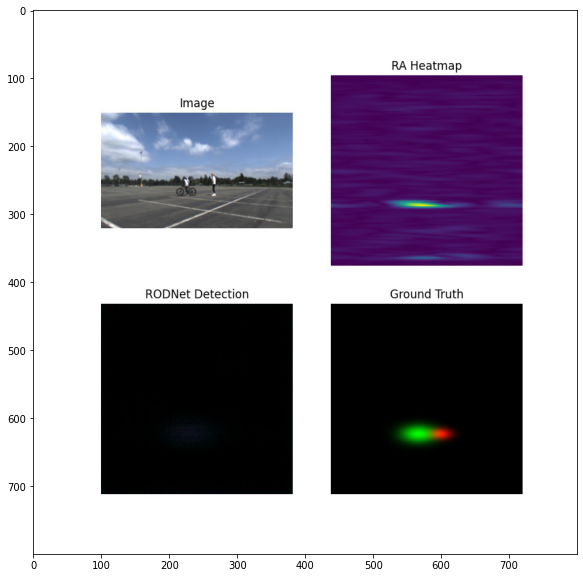

In [ ]:
#For win16 trained-single image 
import matplotlib.pyplot as plt

img = plt.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20211129-110444/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000000.jpg')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(img)

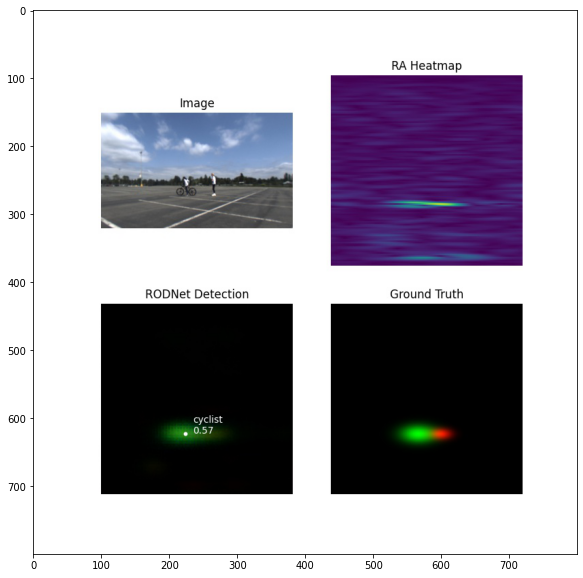

In [ ]:
# TODO
#For win1 trained-single image
import matplotlib.pyplot as plt

img = plt.imread('/content/RODNet/results/rodnet-cdc-win1-wobg-20211129-112614/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000001.jpg')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(img)

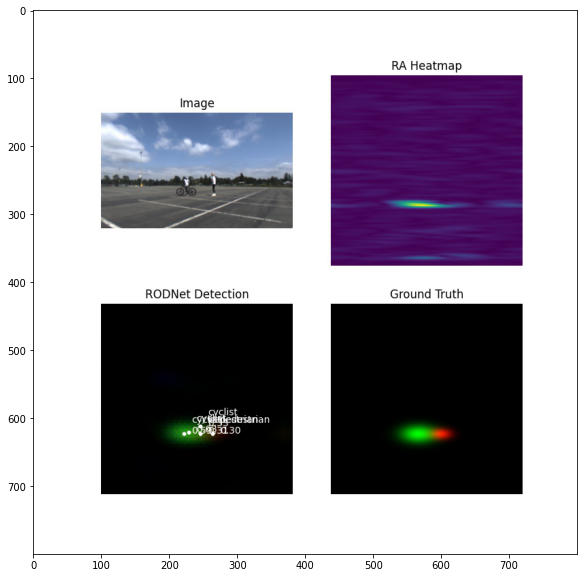

In [ ]:
#For pretrained model-single image
import matplotlib.pyplot as plt

img = plt.imread('/content/RODNet/results/rodnet-cdc-win16-wobg-20201110-004303/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000000.jpg')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(img)

In [ ]:
#For win16 trained-multiple images
import random, os
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2

fig, axs = plt.subplots(2, 3, figsize = (300, 200))
plt.gray()

path = r'/content/RODNet/results/rodnet-cdc-win16-wobg-20211129-110444/2019_05_29_PBMS007_PL_BLUR/rod_viz'
for i, ax in enumerate(axs.flat):
  random_filename = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path, x))])
  img = cv2.imread(path+'/'+random_filename)
  ax.imshow(img, cmap=cm.gray_r)
  ax.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#For win1 trained-multiple images
fig, axs = plt.subplots(2, 3, figsize = (300, 200))
plt.gray()

path = r'/content/RODNet/results/rodnet-cdc-win1-wobg-20211129-112614/2019_05_29_PBMS007_PL_BLUR/rod_viz'
for i, ax in enumerate(axs.flat):
  random_filename = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path, x))])
  img = cv2.imread(path+'/'+random_filename)
  ax.imshow(img, cmap=cm.gray_r)
  ax.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#For pretrained model-multiple images
fig, axs = plt.subplots(2, 3, figsize = (300, 200))
plt.gray()

path = r'/content/RODNet/results/rodnet-cdc-win16-wobg-20201110-004303/2019_05_29_PBMS007_PL_BLUR/rod_viz'
for i, ax in enumerate(axs.flat):
  random_filename = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path, x))])
  img = cv2.imread(path+'/'+random_filename)
  ax.imshow(img, cmap=cm.gray_r)
  ax.axis('off')

Output hidden; open in https://colab.research.google.com to view.

## (d) Discussions

Write your answers to the discussions here.

A) B.1) With the RF images we can detect the presence of objects by visualizing the brightness in the heatmaps. There are multiple RF detection sensors like WIFI transreceiver, RFID sensors that detects the type of images usinf radio frequency signals. Also, with techniques that can handle gradient detection, like HOG, etc can provide some inferences from RF images.

A) D.1) In win 1 the RODnet detection is more than win 16 with 5 epochs of run. Whereas in the pretrained model with 50 epochs the RODnet detection is much more better. As from the results plotted above we can infer that in win 16 the RODNet detection is hardly able to detect something but win 1 shows 1 or 2 confidence scores, whereas pretrained model gives numerous confidence scores of detections. 
When we input clips of frames rather than single frames we get better relative positing of objects and also the images are resized and matched accordingly.

A) D.2) During our experiments we saw that many images that overlap each other cannot be easily detected using RF technology, like in our images we can observe that the cyclist, cycle, etc are getting overlapped and topmost object gives better detection than the lower ones. Also, with 2 different networks with different strides the image detection differs as more stride length may skip few features and vice-versa.


